# Sweep analysis

In [203]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [204]:
# set up plotting settings for dark mode.
from jupyterthemes import jtplot
jtplot.style(theme="grade3", context="notebook", ticks=True, grid=False)
from src.plot_utils import ps_defaults
ps_defaults(use_tex=False, dpi=150)

In [209]:
import pandas as pd
import matplotlib.pyplot as plt
from src.models.poly import fit, plot
from src.constants import ORIG_WANDB_DATA
from src.visualisation.sensitivity import cd_plots, nummode_plots

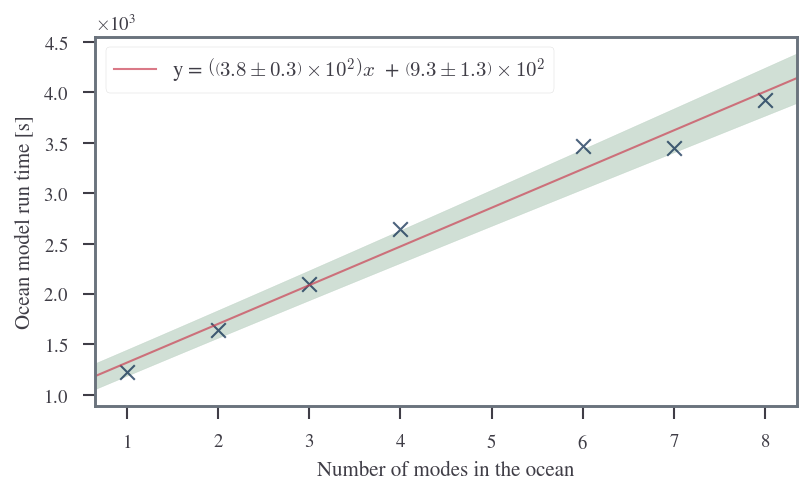

In [210]:
nummode_plots(show_plots=True)

In [238]:
import os
from src.constants import LOG_PATH
from src.configs.load_config import load_config
from src.models.model_setup import ModelSetup

cfg = load_config(test=False)


In [248]:
name_direc_l = []

names = os.listdir(LOG_PATH)
names.sort()
for name in names:
    direc = str(LOG_PATH / name / "wandb" / "latest-run" / "files")
    name_direc_l.append((name, float(name[3:])*1e-3, direc, ModelSetup(direc, cfg,  make_move=False)))

print(name_direc_l)

[('cd_0.0', 0.0, '/home/users/sithom/seager19/logs/cd_0.0/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7fab053bc520>), ('cd_0.5', 0.0005, '/home/users/sithom/seager19/logs/cd_0.5/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7fab050e2cd0>), ('cd_1.7', 0.0017, '/home/users/sithom/seager19/logs/cd_1.7/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7fab053a3580>), ('cd_2.0', 0.002, '/home/users/sithom/seager19/logs/cd_2.0/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7fab053a3a60>), ('cd_2.25', 0.0022500000000000003, '/home/users/sithom/seager19/logs/cd_2.25/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7fab053a32e0>), ('cd_2.5', 0.0025, '/home/users/sithom/seager19/logs/cd_2.5/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7fab053a3220>), ('cd_3.0', 0.003, '/home/users/sithom/seager19/logs/cd_3.0/wandb/latest-run/files', <src.models.mo

In [257]:
cd_and_file = list()

for i in range(len(name_direc_l)):
    print(name_direc_l[i][1])
    print(name_direc_l[i][3].ts_trend(5))
    print(os.path.exists(name_direc_l[i][3].ts_trend(5)))
    cd_and_file.append([name_direc_l[i][1], name_direc_l[i][3].ts_trend(5)])

0.0
/home/users/sithom/seager19/logs/cd_0.0/wandb/latest-run/files/atmos/DATA/ts-5-trend.nc
True
0.0005
/home/users/sithom/seager19/logs/cd_0.5/wandb/latest-run/files/atmos/DATA/ts-5-trend.nc
True
0.0017
/home/users/sithom/seager19/logs/cd_1.7/wandb/latest-run/files/atmos/DATA/ts-5-trend.nc
True
0.002
/home/users/sithom/seager19/logs/cd_2.0/wandb/latest-run/files/atmos/DATA/ts-5-trend.nc
True
0.0022500000000000003
/home/users/sithom/seager19/logs/cd_2.25/wandb/latest-run/files/atmos/DATA/ts-5-trend.nc
True
0.0025
/home/users/sithom/seager19/logs/cd_2.5/wandb/latest-run/files/atmos/DATA/ts-5-trend.nc
True
0.003
/home/users/sithom/seager19/logs/cd_3.0/wandb/latest-run/files/atmos/DATA/ts-5-trend.nc
True
0.0035
/home/users/sithom/seager19/logs/cd_3.5/wandb/latest-run/files/atmos/DATA/ts-5-trend.nc
True


In [259]:
import xarray as xr

In [275]:
da_list = [xr.open_dataarray(cd_and_file[x][1]) for x in range(len(cd_and_file))]

In [276]:
cd_ts_da = xr.concat(da_list, "Cd") 
cd_ts_da.assign_coords({"Cd": [cd_and_file[x][0] for x in range(len(cd_and_file))]})
# [cd_and_file[i][0] for x in range(len(cd_and_file))])

<xarray.DataArray 'ts' (Cd: 8, Y: 181, X: 360)>
array([[[ 0.1664127 ,  0.22141638,  0.22141638, ...,  0.11140902,
          0.11140902,  0.11140902],
        [ 0.1664127 ,  0.22141638,  0.22141638, ...,  0.11140902,
          0.11140902,  0.11140902],
        [ 0.1664127 ,  0.22141637,  0.22141637, ...,  0.11140902,
          0.11140902,  0.11140902],
        ...,
        [-0.0058479 , -0.00650411, -0.00715657, ..., -0.00408824,
         -0.00465073, -0.00522466],
        [-0.0103926 , -0.01060788, -0.01082049, ..., -0.00973036,
         -0.00995387, -0.01017461],
        [-0.01171516, -0.01178357, -0.0118517 , ..., -0.01150822,
         -0.01157749, -0.01164647]],

       [[ 0.1664127 ,  0.22141638,  0.22141638, ...,  0.11140902,
          0.11140902,  0.11140902],
        [ 0.1664127 ,  0.22141638,  0.22141638, ...,  0.11140902,
          0.11140902,  0.11140902],
        [ 0.1664127 ,  0.22141637,  0.22141637, ...,  0.11140902,
          0.11140902,  0.11140902],
...
        [-0.0058479 , -0.00650411, -0.00715657, ..., -0.00408824,
         -0.00465073, -0.00522466],
        [-0.0103926 , -0.01060788, -0.01082049, ..., -0.00973036,
         -0.00995387, -0.01017461],
        [-0.01171516, -0.01178357, -0.0118517 , ..., -0.01150822,
         -0.01157749, -0.01164647]],

       [[ 0.1664127 ,  0.22141638,  0.22141638, ...,  0.11140902,
          0.11140902,  0.11140902],
        [ 0.1664127 ,  0.22141638,  0.22141638, ...,  0.11140902,
          0.11140902,  0.11140902],
        [ 0.1664127 ,  0.22141637,  0.22141637, ...,  0.11140902,
          0.11140902,  0.11140902],
        ...,
        [-0.0058479 , -0.00650411, -0.00715657, ..., -0.00408824,
         -0.00465073, -0.00522466],
        [-0.0103926 , -0.01060788, -0.01082049, ..., -0.00973036,
         -0.00995387, -0.01017461],
        [-0.01171516, -0.01178357, -0.0118517 , ..., -0.01150822,
         -0.01157749, -0.01164647]]], dtype=float32)
Coordinates:
  * X        (X) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * Y        (Y) float32 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * Cd       (Cd) float64 0.0 0.0005 0.0017 0.002 0.00225 0.0025 0.003 0.0035
Attributes:
    _Fillvalue:          9.96921e+36
    standard_name:       sea_water_potential_temperature
    associate:           time depth lat lon
    dodsname:            sst
    interval_write:      monthly
    file_missing_value:  -999
    _CoordinateAxes:     time depth lat lon
    offline_operation:   time average and spatial interpolation
    coordinates:         time depth lat lon
    units:               degree_Celsius
    long_name:           sst
    longname:            sst

In [329]:
(cd_ts_da.coords["$C_d$"][-1] - cd_ts_da.coords["$C_d$"][0]


<xarray.DataArray '$C_d$' ()>
array(0.0035)

In [309]:
from src.xr_utils import get_trend, sel
from src.plot_utils import add_units, cmap, get_dim
from src.constants import FIGURE_PATH

In [348]:
cd_and_file[1][0]

0.0005

In [416]:
from src.visualisation.sensitivity import cd_heatmaps

[('cd_0.0', 0.0, '/home/users/sithom/seager19/logs/cd_0.0/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7faafce60100>), ('cd_0.5', 0.0005, '/home/users/sithom/seager19/logs/cd_0.5/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7faafd5516d0>), ('cd_1.7', 0.0017, '/home/users/sithom/seager19/logs/cd_1.7/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7faafd551730>), ('cd_2.0', 0.002, '/home/users/sithom/seager19/logs/cd_2.0/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7faafd5df8b0>), ('cd_2.25', 0.0022500000000000003, '/home/users/sithom/seager19/logs/cd_2.25/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7faafd5429a0>), ('cd_2.5', 0.0025, '/home/users/sithom/seager19/logs/cd_2.5/wandb/latest-run/files', <src.models.model_setup.ModelSetup object at 0x7faafd5421f0>), ('cd_3.0', 0.003, '/home/users/sithom/seager19/logs/cd_3.0/wandb/latest-run/files', <src.models.mo

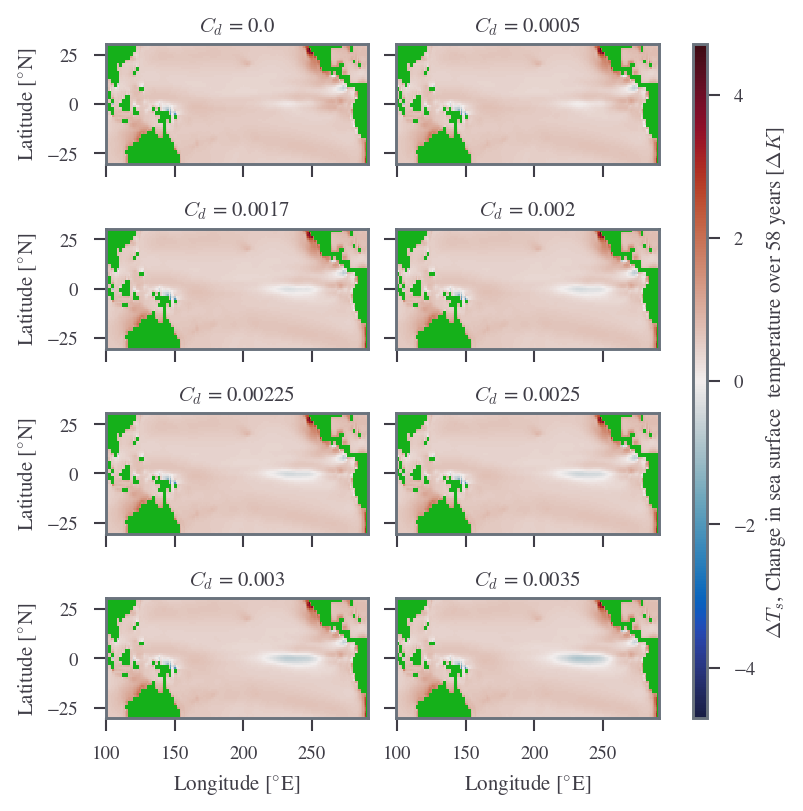

run 0.0035 slope <xarray.DataArray 'polyfit_coefficients' (Y: 61, X: 191)>
array([[ 2.08104843,  2.13992   ,  2.2010991 , ..., 46.9893337 ,
        47.95186803,         nan],
       [ 1.96360823,  2.0460993 ,  2.10532457, ..., 49.90301379,
        39.89354226,         nan],
       [ 1.79108885,  1.87537515,  1.9188298 , ..., 51.09361003,
        43.61083254,         nan],
       ...,
       [        nan,         nan,         nan, ...,  1.40077773,
         1.33540427,  1.2343402 ],
       [        nan,         nan,         nan, ...,  1.31276361,
         1.12636653,  1.01472283],
       [        nan,         nan,         nan, ...,  1.44186236,
         1.06263214,  0.86254237]])
Coordinates:
  * Y        (Y) float64 -30.0 -29.0 -28.0 -27.0 -26.0 ... 27.0 28.0 29.0 30.0
  * X        (X) float64 100.0 101.0 102.0 103.0 ... 287.0 288.0 289.0 290.0 rise = slope * run <xarray.DataArray 'rise' (Y: 61, X: 191)>
array([[0.00728367, 0.00748972, 0.00770385, ..., 0.16446267, 0.16783154,
         

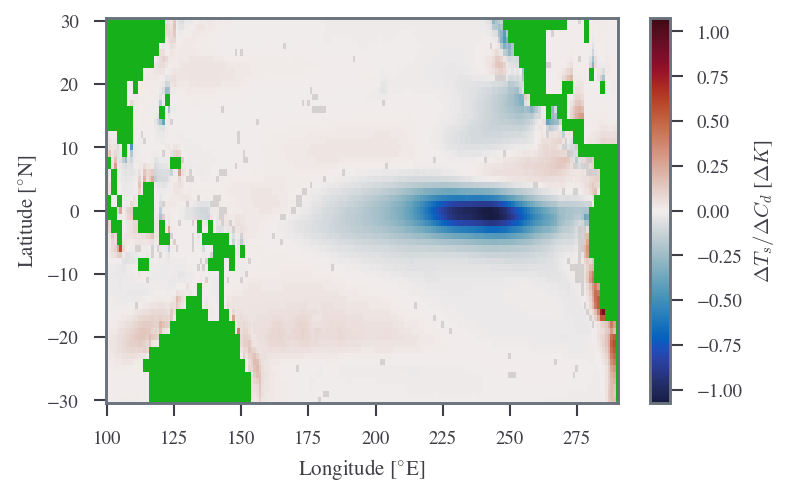

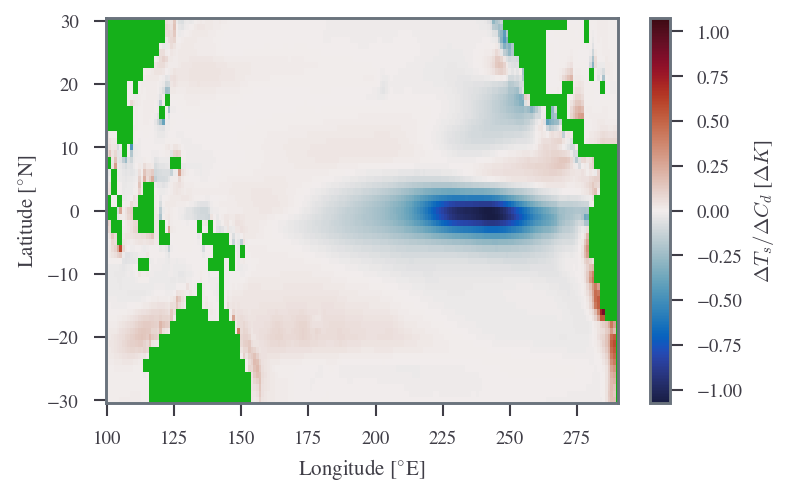

In [421]:
cd_heatmaps(show_plots=True)

In [321]:
cd_ts_da = xr.concat(da_list, r"$C_d$").assign_coords({r"$C_d$": [cd_and_file[x][0] for x in range(len(cd_and_file))]})

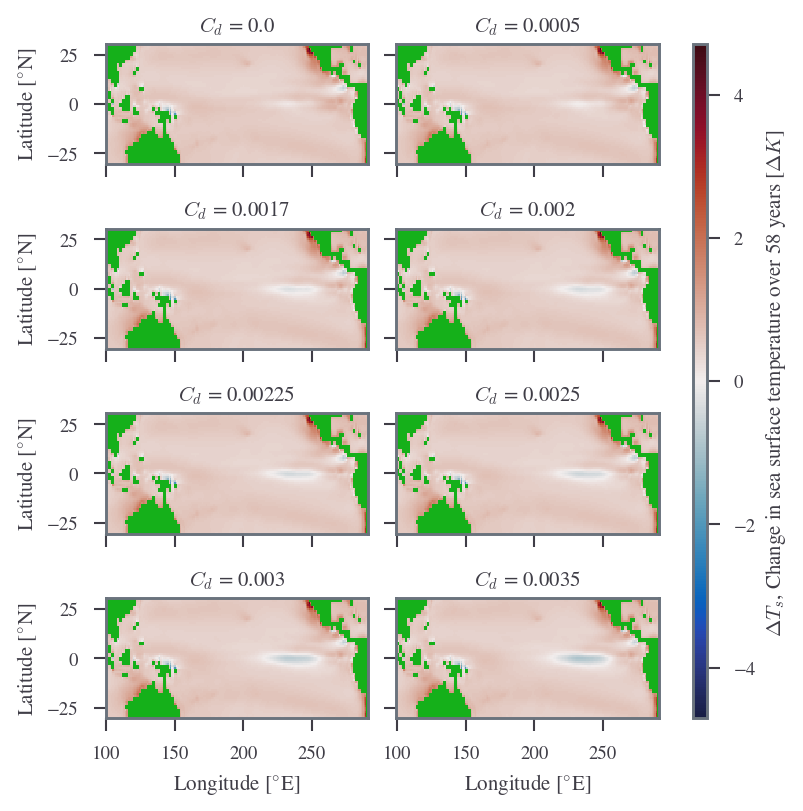

In [330]:
clip(cd_ts_da).plot(col="$C_d$", aspect=2, col_wrap=2, cmap=cmap("delta"), cbar_kwargs={"aspect":50, "label": "$\Delta T_s$, Change in sea surface temperature over 58 years [$\Delta K$] "}, figsize=get_dim(ratio=1))
plt.savefig(FIGURE_PATH / "cd_facetplot.png")

In [300]:
setup = ModelSetup(direc, cfg)

In [304]:
mask = xr.open_dataset(setup.om_mask()).mask

def clip(da: xr.DataArray):
    return add_units(sel(da).where(sel(mask) != 0.0))

In [396]:
rise, hatch_mask = get_trend(clip(cd_ts_da), min_clim_f=False, t_var="$C_d$", make_hatch_mask=True)

run 0.0035 slope <xarray.DataArray 'polyfit_coefficients' (Y: 61, X: 191)>
array([[ 2.08104843,  2.13992   ,  2.2010991 , ..., 46.9893337 ,
        47.95186803,         nan],
       [ 1.96360823,  2.0460993 ,  2.10532457, ..., 49.90301379,
        39.89354226,         nan],
       [ 1.79108885,  1.87537515,  1.9188298 , ..., 51.09361003,
        43.61083254,         nan],
       ...,
       [        nan,         nan,         nan, ...,  1.40077773,
         1.33540427,  1.2343402 ],
       [        nan,         nan,         nan, ...,  1.31276361,
         1.12636653,  1.01472283],
       [        nan,         nan,         nan, ...,  1.44186236,
         1.06263214,  0.86254237]])
Coordinates:
  * Y        (Y) float64 -30.0 -29.0 -28.0 -27.0 -26.0 ... 27.0 28.0 29.0 30.0
  * X        (X) float64 100.0 101.0 102.0 103.0 ... 287.0 288.0 289.0 290.0 rise = slope * run <xarray.DataArray 'rise' (Y: 61, X: 191)>
array([[0.00728367, 0.00748972, 0.00770385, ..., 0.16446267, 0.16783154,
         

Text(0.5, 1.0, '')

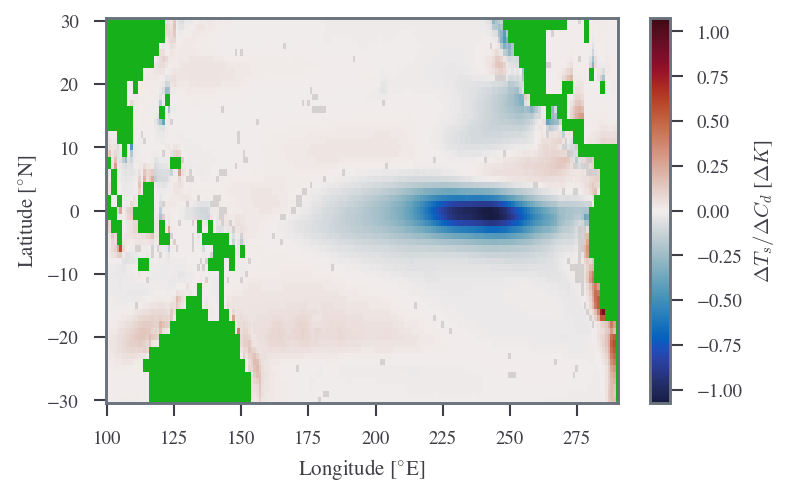

In [415]:
add_units(rise).plot(cmap=cmap("delta"), cbar_kwargs={"label": "$\Delta T_s / \Delta C_d$ [$\Delta K$]"})
add_units(hatch_mask).where(hatch_mask != 0).plot(add_colorbar=False, cmap='Greys', alpha=0.3)
plt.title("")
plt.savefig(FIGURE_PATH / "ts_cd_sensitivity_hatched.png")

0
run 0.0035 slope <xarray.DataArray 'polyfit_coefficients' (Y: 61, X: 191)>
array([[ 2.08104843,  2.13992   ,  2.2010991 , ..., 46.9893337 ,
        47.95186803,         nan],
       [ 1.96360823,  2.0460993 ,  2.10532457, ..., 49.90301379,
        39.89354226,         nan],
       [ 1.79108885,  1.87537515,  1.9188298 , ..., 51.09361003,
        43.61083254,         nan],
       ...,
       [        nan,         nan,         nan, ...,  1.40077773,
         1.33540427,  1.2343402 ],
       [        nan,         nan,         nan, ...,  1.31276361,
         1.12636653,  1.01472283],
       [        nan,         nan,         nan, ...,  1.44186236,
         1.06263214,  0.86254237]])
Coordinates:
  * Y        (Y) float64 -30.0 -29.0 -28.0 -27.0 -26.0 ... 27.0 28.0 29.0 30.0
  * X        (X) float64 100.0 101.0 102.0 103.0 ... 287.0 288.0 289.0 290.0 rise = slope * run <xarray.DataArray 'rise' (Y: 61, X: 191)>
array([[0.00728367, 0.00748972, 0.00770385, ..., 0.16446267, 0.16783154,
       

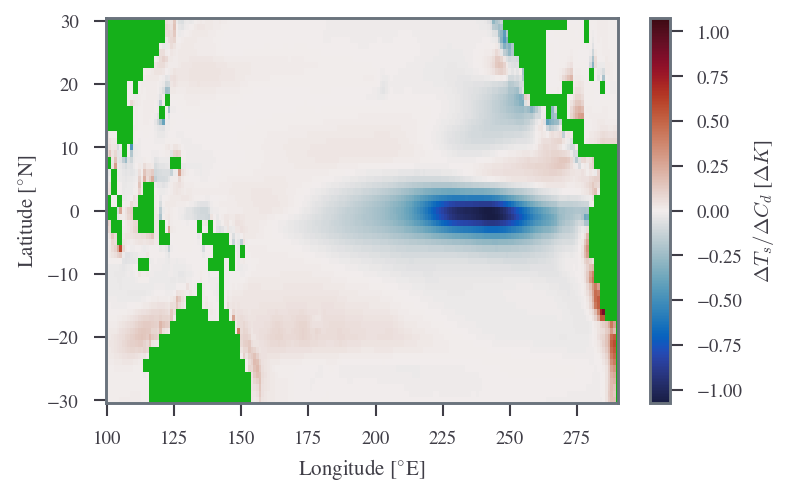

In [338]:
get_trend(clip(cd_ts_da), min_clim_f=False, t_var="$C_d$").plot(
    cmap=cmap("delta"), cbar_kwargs={"label": "$\Delta T_s / \Delta C_d$ [$\Delta K$]"}
)

In [342]:
slope = clip(cd_ts_da).polyfit("$C_d$", 1, cov=True)

In [394]:
print(slope)

<xarray.Dataset>
Dimensions:               (X: 191, Y: 61, cov_i: 2, cov_j: 2, degree: 2)
Coordinates:
  * degree                (degree) int64 1 0
  * Y                     (Y) float64 -30.0 -29.0 -28.0 -27.0 ... 28.0 29.0 30.0
  * X                     (X) float64 100.0 101.0 102.0 ... 288.0 289.0 290.0
Dimensions without coordinates: cov_i, cov_j
Data variables:
    polyfit_coefficients  (degree, Y, X) float64 2.081 2.14 ... 0.6573 0.6563
    polyfit_residuals     (Y, X) float64 4.537e-07 4.603e-07 ... 2.6e-11
    polyfit_covariance    (cov_i, cov_j, Y, X) float64 0.007665 ... 2.18e-12


In [363]:
print(slope.polyfit_coefficients.isel(X=0, Y=0).values)
print(np.sqrt(np.diag(slope.polyfit_covariance.isel(X=0, Y=0).values)))

[2.08104843 0.61136685]
[0.0875496  0.00019504]


In [366]:
print(slope.polyfit_coefficients.isel(X=0, Y=0, degree=0).values)
print(np.sqrt(slope.polyfit_covariance.isel(cov_i=0, cov_j=0, X=0, Y=0)).values)

2.0810484293276463
0.08754959807976569


In [377]:
frac_error = np.abs(np.sqrt(slope.polyfit_covariance.isel(cov_i=0, cov_j=0)) / slope.polyfit_coefficients.isel(degree=0))

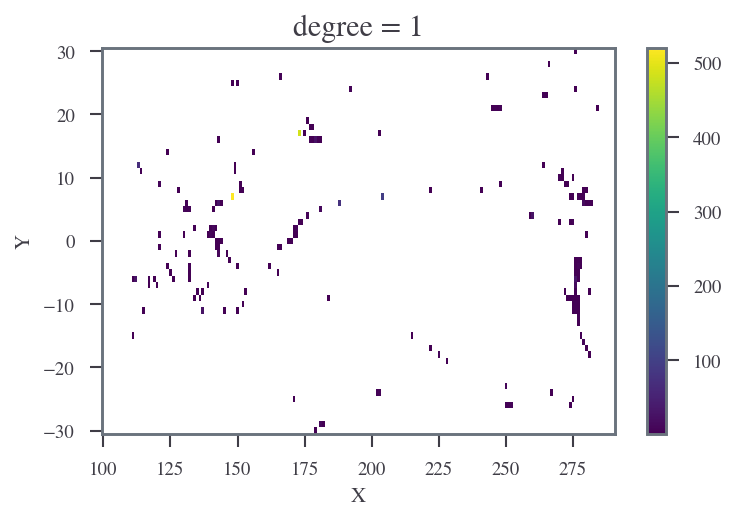

In [378]:
frac_error.where(frac_error>=1.0).plot()

In [386]:
stiple_da = frac_error>=1.0
stiple_da = stiple_da.where(stiple_da != 0.0)

In [393]:
# stiple_da.to_pandas().plot(x="X", y="Y")

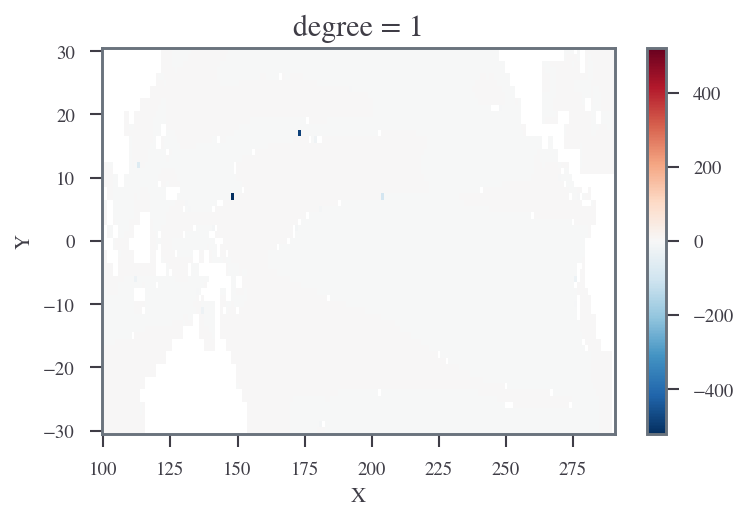

In [376]:
frac_error.where(frac_error<=1.0).plot()

In [362]:
slope

<xarray.Dataset>
Dimensions:               (X: 191, Y: 61, cov_i: 2, cov_j: 2, degree: 2)
Coordinates:
  * degree                (degree) int64 1 0
  * Y                     (Y) float64 -30.0 -29.0 -28.0 -27.0 ... 28.0 29.0 30.0
  * X                     (X) float64 100.0 101.0 102.0 ... 288.0 289.0 290.0
Dimensions without coordinates: cov_i, cov_j
Data variables:
    polyfit_coefficients  (degree, Y, X) float64 2.081 2.14 ... 0.6573 0.6563
    polyfit_residuals     (Y, X) float64 4.537e-07 4.603e-07 ... 2.6e-11
    polyfit_covariance    (cov_i, cov_j, Y, X) float64 0.007665 ... 2.18e-12

In [212]:
df = pd.read_csv(ORIG_WANDB_DATA)
df_filtered = df[0:10]
df_filtered["name"]

0     cd_1.5
1     cd_1.7
2      cd2.1
3    iter_10
4     cd_2.0
5     cd_1.0
6     cd_1.2
7     cd_2.7
8    cd_norm
9     cd_1.4
Name: name, dtype: object

In [12]:
df_filtered[df_filtered["state"] == "finished"]

,config_animate,config_atm,config_atmos,config_coup,config_gcc,config_gfortran,config_name,config_notes,config_oc,config_ocean,...,end_ocean_run,end_trend_nino1+2,end_trend_nino3,end_trend_nino3.4,end_trend_nino4,end_trend_pac,name,state,tags,url
2,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0021, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd2.1,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,611.403570,0.545854,0.267445,0.289337,0.519428,0.559440,cd2.1,finished,[],https://wandb.ai/sdat2/seager19/runs/38x0f2kg
6,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0012, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.2,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1536.788786,0.560243,0.375186,0.375603,0.541339,0.568021,cd_1.2,finished,[],https://wandb.ai/sdat2/seager19/runs/3a4idlie
7,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0027, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_2.7,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1534.777277,0.561919,0.200153,0.221862,0.500907,0.554369,cd_2.7,finished,[],https://wandb.ai/sdat2/seager19/runs/1vre85tn
8,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.00225, 'rho_air': 1.225, 'iterations...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_norm,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1416.614244,0.548096,0.250295,0.273214,0.515109,0.558128,cd_norm,finished,[],https://wandb.ai/sdat2/seager19/runs/3ke8yisi
9,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0014, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.4,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1408.525637,0.552706,0.350710,0.357990,0.537039,0.566020,cd_1.4,finished,[],https://wandb.ai/sdat2/seager19/runs/2um7xc7h


In [ ]:
plot(cd_list, nino_34_list)

Text(0, 0.5, 'Trend over nino3.4 region [K]')

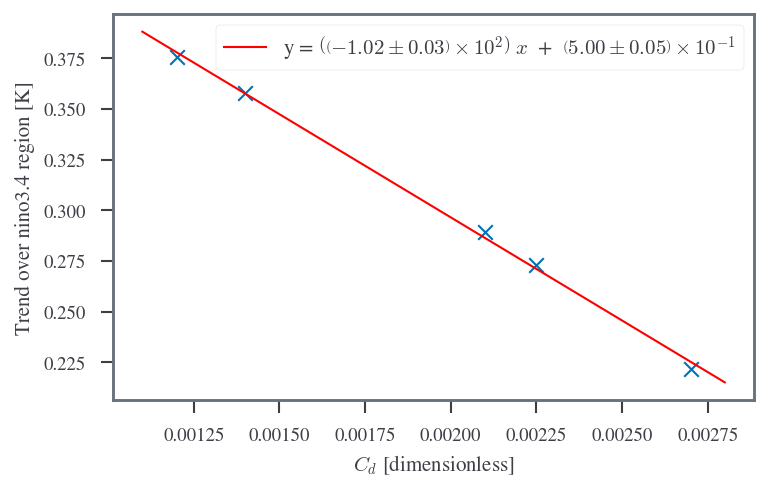

In [101]:
cd_list = list()

for coup_dict_str in df_filtered[df_filtered["state"] == "finished"]["config_coup"]:
    coup_dict = eval(coup_dict_str)
    cd_list.append(coup_dict['c_d'])

nino_34_list = df_filtered[df_filtered["state"] == "finished"]['end_trend_nino3.4'].tolist()

plt.scatter(cd_list, nino_34_list)

param, func = fit(cd_list, nino_34_list)
x_pred = np.linspace(min(cd_list)-1e-4, max(cd_list)+1e-4, num=50)
y_pred = func(x_pred)
plt.plot(x_pred, y_pred, label="y = " + tex_param(param[0], bracket=True) + " $x$  +  "+ tex_param(param[1], bracket=False), color='red')
plt.legend()
plt.xlabel("$C_d$ [dimensionless]")
plt.ylabel(r"Trend over nino3.4 region [K]")

In [104]:
nino_12_list = df_filtered[df_filtered["state"] == "finished"]['end_trend_nino1+2'].tolist()

(array([27418.409767606343+/-1701.4806951652604,
        -108.28425988198993+/-6.798490809462341,
        0.6506078960356172+/-0.006236951970407278], dtype=object),
 <function src.models.linear._return_func.<locals>.parab(x: Sequence[Union[float, ufloat]]) -> <built-in function array>>)

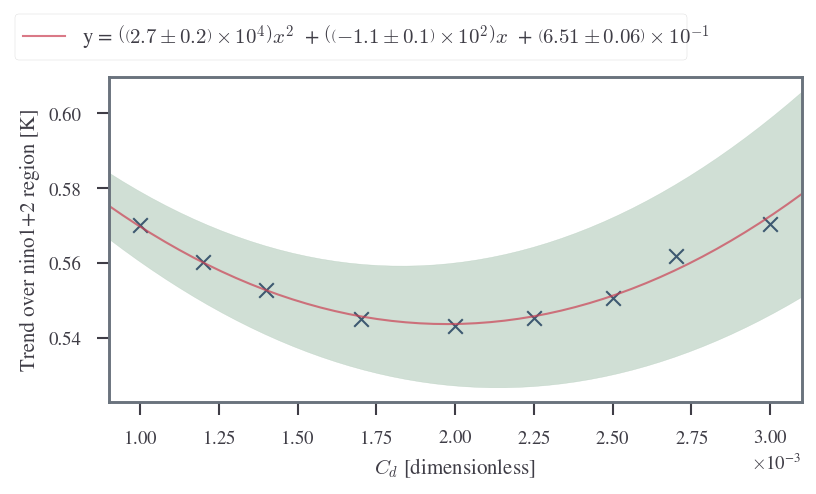

In [198]:
plot(cd_list, nino_12_list, reg_type="parab", x_label="$C_d$ [dimensionless]", y_label=r"Trend over nino1+2 region [K]", ax_format="x")

In [108]:
df_filtered[df_filtered["state"] == "finished"]['end_trend_nino3.4'].tolist()

[0.2893372901599713,
 0.3756030916768101,
 0.2218623636697925,
 0.2732137618555352,
 0.3579899903177476]

In [45]:
from src.models.poly import fit

In [190]:
from src.visualisation.sensitivity import cd_plots

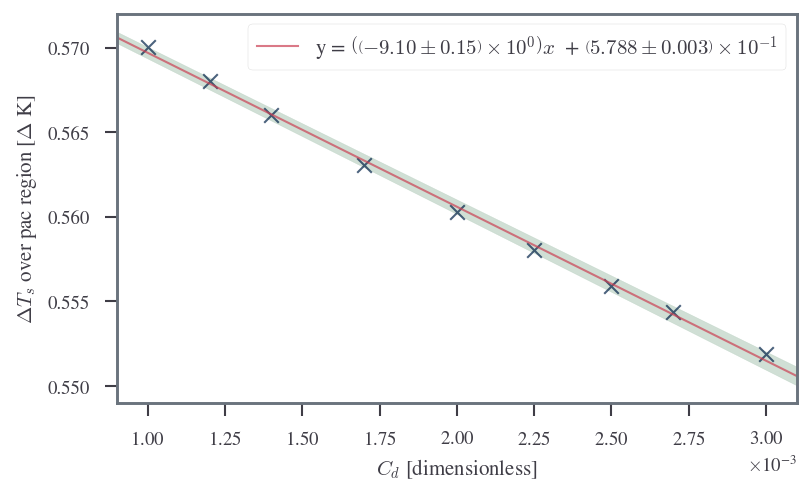

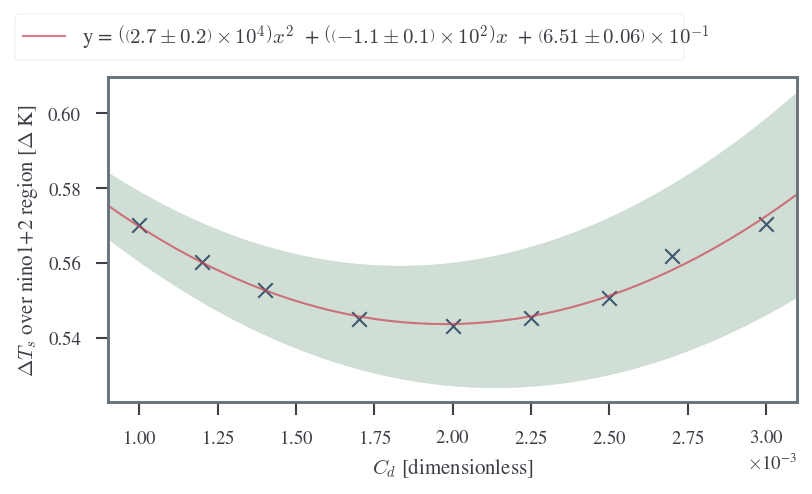

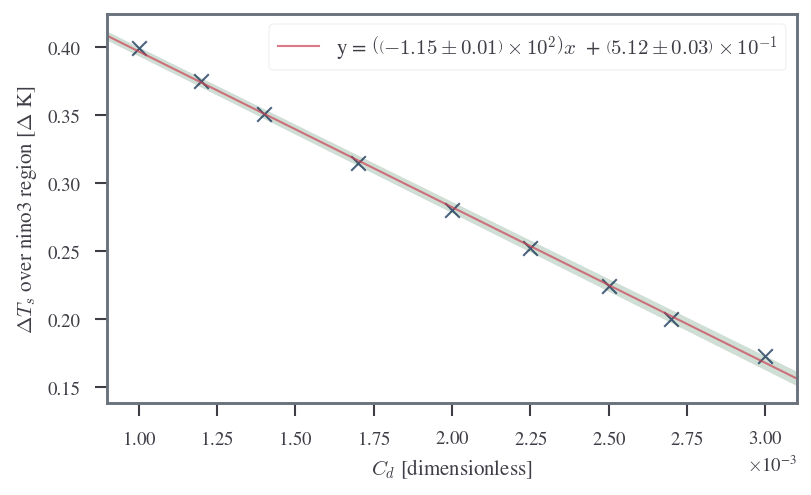

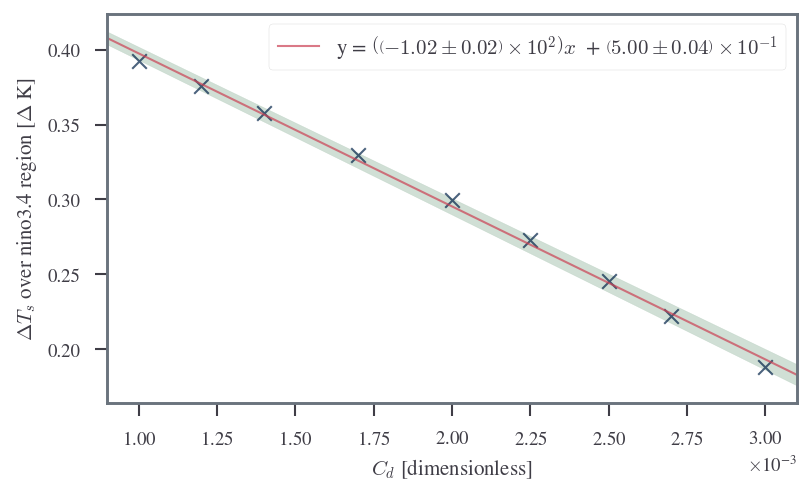

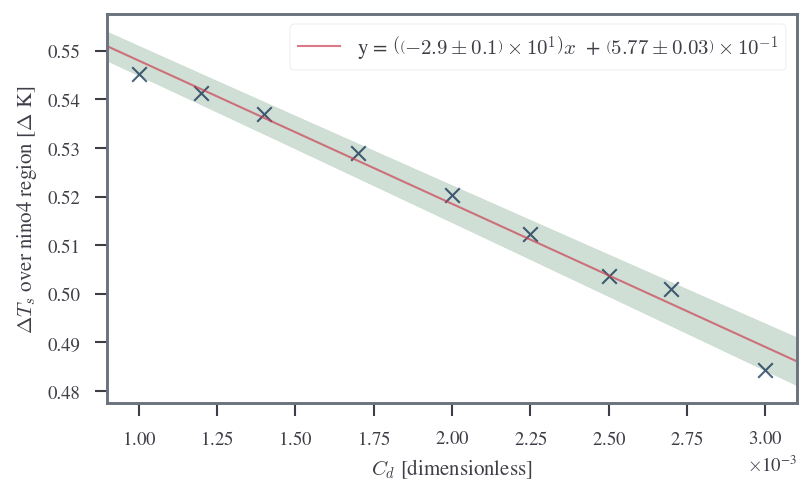

In [202]:
cd_plots(show_plots=True)

(array([384.1449947564574+/-25.19822850587081,
        934.291707766886+/-127.42290711945267], dtype=object),
 <function src.models.linear._return_func.<locals>.lin(x: Sequence[Union[float, ufloat]]) -> <built-in function array>>)

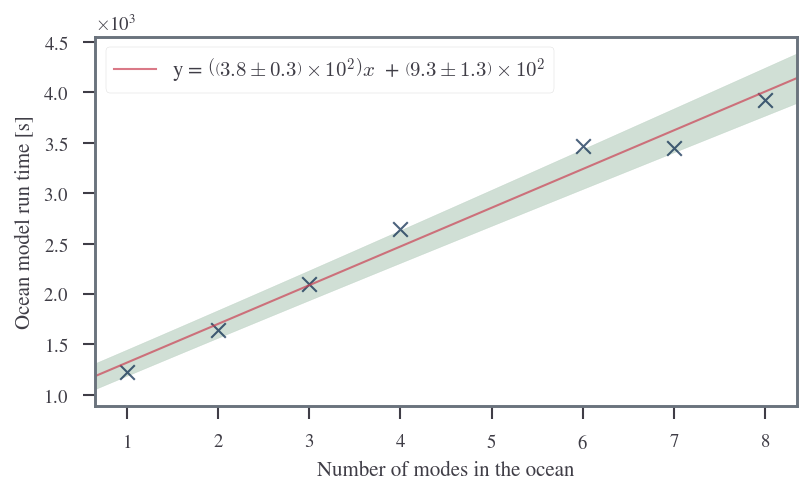

In [171]:
uncoup_df = df[13:]
uncoup_df = uncoup_df[uncoup_df["state"] == "finished"]
nummode_list = list()

for coup_dict_str in uncoup_df[uncoup_df["state"] == "finished"]["config_oc"]:
    coup_dict = eval(coup_dict_str)
    nummode_list.append(coup_dict["nummode"])

ocean_run_list = uncoup_df[uncoup_df["state"] == "finished"]["end_ocean_run"].tolist()
plot(
    nummode_list,
    ocean_run_list,
    x_label="Number of modes in the ocean",
    y_label="Ocean model run time [s]",
)

In [82]:
df

,config_animate,config_atm,config_atmos,config_coup,config_gcc,config_gfortran,config_name,config_notes,config_oc,config_ocean,...,end_ocean_run,end_trend_nino1+2,end_trend_nino3,end_trend_nino3.4,end_trend_nino4,end_trend_pac,name,state,tags,url
0,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 1.5, 'rho_air': 1.225, 'iterations': 5}",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.5,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,NaN,NaN,NaN,NaN,NaN,NaN,cd_1.5,running,[],https://wandb.ai/sdat2/seager19/runs/q7wepo0q
1,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0017, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.7,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,NaN,NaN,NaN,NaN,NaN,NaN,cd_1.7,running,[],https://wandb.ai/sdat2/seager19/runs/1iqk78iv
2,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0021, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd2.1,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,611.403570,0.545854,0.267445,0.289337,0.519428,0.559440,cd2.1,finished,[],https://wandb.ai/sdat2/seager19/runs/38x0f2kg
3,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.00225, 'rho_air': 1.225, 'iterations...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,iter_10,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,NaN,NaN,NaN,NaN,NaN,NaN,iter_10,running,[],https://wandb.ai/sdat2/seager19/runs/1z4nbr57
4,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.002, 'rho_air': 1.225, 'iterations': 5}",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_2.0,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,NaN,NaN,NaN,NaN,NaN,NaN,cd_2.0,running,[],https://wandb.ai/sdat2/seager19/runs/2bba40eq
5,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.001, 'rho_air': 1.225, 'iterations': 5}",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.0,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,NaN,NaN,NaN,NaN,NaN,NaN,cd_1.0,running,[],https://wandb.ai/sdat2/seager19/runs/1f7i2qtn
6,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0012, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_1.2,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1536.788786,0.560243,0.375186,0.375603,0.541339,0.568021,cd_1.2,finished,[],https://wandb.ai/sdat2/seager19/runs/3a4idlie
7,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.0027, 'rho_air': 1.225, 'iterations'...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_2.7,test,"{'nummode': 2, 'boundaries': 'Periodic', 'wind...","{'tcom_name': 'tcom', 'tios2cdf_name': 'tios2c...",...,1534.777277,0.561919,0.200153,0.221862,0.500907,0.554369,cd_2.7,finished,[],https://wandb.ai/sdat2/seager19/runs/1vre85tn
8,True,"{'k_days': 10, 'e_frac': 2.0, 'prcp_land': 1, ...",True,"{'c_d': 0.00225, 'rho_air': 1.225, 'iterations...",gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,gcc version 4.8.5 20150623 (Red Hat 4.8.5-44) ...,cd_norm,test,"{'nummode': 2, 'boundaries': 'Pe

In [156]:
f_df = pd.DataFrame(run_info)[3:13]
f_df = f_df.drop(labels=[11], axis=0)

In [157]:
f_df

,tags,url,name,state,created_at,description,end__step,end_coupling_video_pac_mask_land,end_final_nino_graph,end_coupling_video,...,end_mean_pac,end_mean_nino3,end_mean_nino1+2,end_trend_nino4,end_mean_nino4,end_it,end_trend_nino3.4,end_trend_nino3,end_ocean_run,end_mean_nino3.4
3,[],https://wandb.ai/sdat2/seager19/runs/vf5mt15q,cd_2.25,finished,2021-06-18T07:14:15,cd_2.25\ntest,5.0,NaN,NaN,NaN,...,26.249826,25.918081,23.804113,0.512352,28.672258,5.0,0.272921,0.252111,609.020305,27.049664
4,[],https://wandb.ai/sdat2/seager19/runs/suszf2cj,cd_2.5,finished,2021-06-17T19:38:34,cd_2.5\ntest,5.0,NaN,NaN,NaN,...,26.248495,25.903515,23.798010,0.503705,28.668148,5.0,0.245480,0.224811,612.397781,27.038048
5,[],https://wandb.ai/sdat2/seager19/runs/3jcljvx5,cd_3.0,finished,2021-06-17T19:26:54,cd_3.0\ntest,5.0,NaN,NaN,NaN,...,26.245897,25.875046,23.789110,0.484285,28.659069,5.0,0.188316,0.172847,600.025732,27.014034
6,[],https://wandb.ai/sdat2/seager19/runs/176yerzi,cd_1.0,finished,2021-06-17T16:42:18,cd_1.0\ntest,5.0,NaN,NaN,NaN,...,26.256672,25.992216,23.850870,0.545194,28.688330,5.0,0.392332,0.399876,610.703086,27.100973
7,[],https://wandb.ai/sdat2/seager19/runs/184vohdn,cd_2.0,finished,2021-06-17T16:41:05,cd_2.0\ntest,5.0,NaN,NaN,NaN,...,26.251177,25.932804,23.811306,0.520285,28.676069,5.0,0.299343,0.280223,609.803768,27.060904
8,[],https://wandb.ai/sdat2/seager19/runs/1levxkju,cd_1.7,finished,2021-06-17T16:38:53,cd_1.7\ntest,5.0,NaN,NaN,NaN,...,26.252819,25.950642,23.821369,0.528875,28.680243,5.0,0.329507,0.315118,607.724638,27.073811
9,[],https://wandb.ai/sdat2/seager19/runs/3a4idlie,cd_1.2,finished,2021-06-16T22:01:40,cd_1.2\ntest,4.0,NaN,NaN,NaN,...,26.255571,25.980312,23.841772,0.541339,28.686388,4.0,0.375603,0.375186,1536.788786,27.093679
10,[],https://wandb.ai/sdat2/seager19/runs/1vre85tn,cd_2.7,finished,2021-06-16T22:01:30,cd_2.7\ntest,4.0,NaN,NaN,NaN,...,26.247383,25.889904,23.795025,0.500907,28.666697,4.0,0.221862,0.200153,1534.777277,27.027668
12,[],https://wandb.ai/sdat2/seager19/runs/2um7xc7h,cd_1.4,finished,2021-06-16T18:32:10,cd_1.4\ntest,4.0,NaN,NaN,NaN,...,26.254467,25.968351,23.833237,0.537039,28.684240,4.0,0.357990,0.350710,1408.525637,27.086039


(array([-102.25921388842445+/-1.896220364686788,
        0.4998282984620612+/-0.003941853534743846], dtype=object),
 <function src.models.linear._return_func.<locals>.lin(x: Sequence[Union[float, ufloat]]) -> <built-in function array>>)

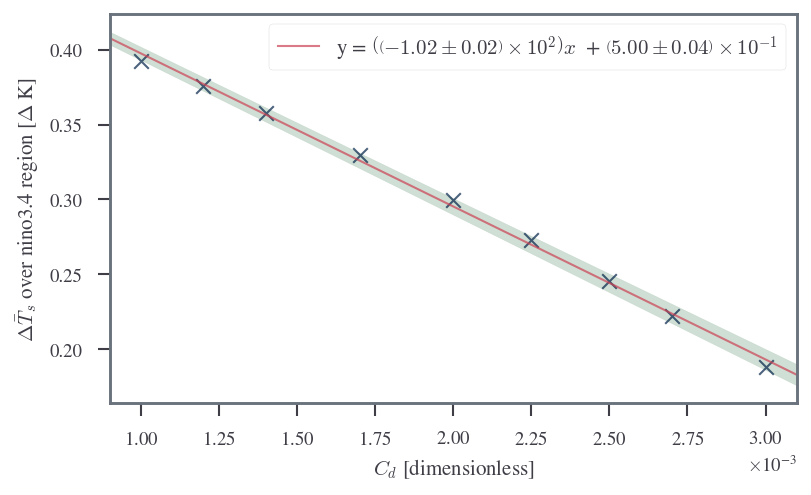

In [177]:
cd_list = list()

for coup_dict_str in f_df["config_coup"]:
    coup_dict = eval(coup_dict_str)
    cd_list.append(coup_dict["c_d"])

nino_34_list = f_df["end_trend_nino3.4"].tolist()

plot(
    cd_list,
    nino_34_list,
    x_label="$C_d$ [dimensionless]",
    y_label=r"$\Delta \bar{T}_s$ over nino3.4 region [$\Delta$ K]",
    ax_format="x",
)

(array([27418.409767606343+/-1701.4806951652604,
        -108.28425988198993+/-6.798490809462341,
        0.6506078960356172+/-0.006236951970407278], dtype=object),
 <function src.models.linear._return_func.<locals>.parab(x: Sequence[Union[float, ufloat]]) -> <built-in function array>>)

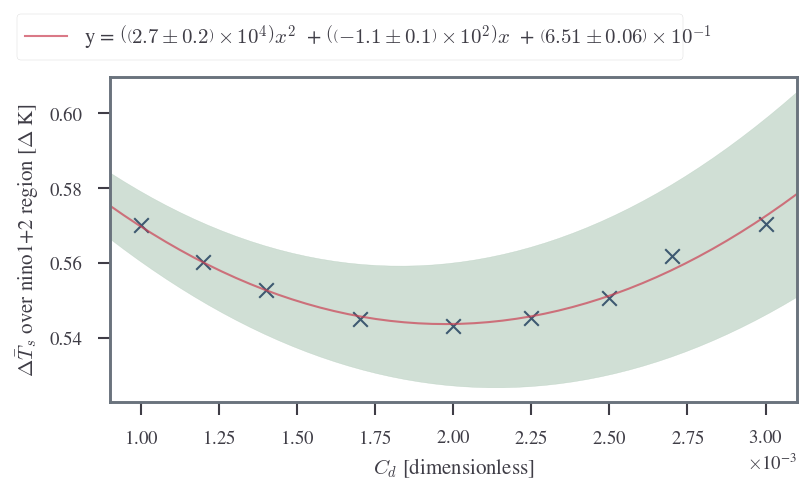

In [176]:
nino_12_list = f_df["end_trend_nino1+2"].tolist()
plot(
    cd_list,
    nino_12_list,
    x_label="$C_d$ [dimensionless]",
    y_label=r"$\Delta \bar{T}_s$ over nino1+2 region [$\Delta$ K]",
    ax_format="x",
    reg_type="parab",
)